In [1]:
import pandas as pd 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


df = pd.read_csv("capitalbikeshare.csv")
pd.set_option('display.max_rows', 20)


In [2]:
df.head(20)


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,145,2019-11-01 00:01:54,2019-11-01 00:04:19,31020,Wilson Blvd & N Franklin Rd,31030,Lee Hwy & N Adams St,W23365,Member
1,445,2019-11-01 00:02:21,2019-11-01 00:09:47,31201,15th & P St NW,31110,20th St & Florida Ave NW,W21220,Member
2,870,2019-11-01 00:03:37,2019-11-01 00:18:08,31293,31st & Water St NW,31229,New Hampshire Ave & T St NW,W00770,Member
3,2658,2019-11-01 00:07:33,2019-11-01 00:51:52,31509,New Jersey Ave & R St NW,31130,7th & S St NW,W22072,Member
4,1180,2019-11-01 00:09:35,2019-11-01 00:29:16,31243,4th & C St SW,31625,3rd & G St SE,W20688,Member
5,373,2019-11-01 00:13:48,2019-11-01 00:20:02,31649,14th & Newton St NW,31122,16th & Irving St NW,W00811,Member
6,234,2019-11-01 00:14:41,2019-11-01 00:18:36,32048,Bethesda Metro / Wisconsin Ave & Old Georgetow...,32029,Offutt Ln & Chevy Chase Dr,W24114,Member
7,5422,2019-11-01 00:18:50,2019-11-01 01:49:13,31286,11th & O St NW,31101,14th & V St NW,W24065,Member
8,1355,2019-11-01 00:27:57,2019-11-01 00:50:32,31623,Columbus Circle / Union Station,31237,25th St & Pennsylvania Ave NW,W22621,Member
9,733,2019-11-01 00:28:29,2019-11-01 00:40:43,31101,14th & V St NW,31602,Park Rd & Holmead Pl NW,W23386,Member


In [3]:
first = 31620
last = 31625
temp = (df["Start station number"] >=first) & (df["Start station number"] <=last) & (df["End station number"]>= first) & (df["End station number"]<= last)


bs=df[temp].sort_values(["Start station number"])
# just for clarity in presentation
bs = bs.drop(["Member type","Start date","Start station", "End station","End date","Bike number"], axis=1)
bs


,Duration,Start station number,End station number
179366,2140,31620,31623
155626,294,31620,31624
14323,518,31620,31623
74389,1466,31620,31622
158817,324,31620,31624
17521,853,31620,31624
122176,183,31620,31621
73268,868,31620,31622
72241,369,31620,31624
71672,402,31620,31624


### Groupby

https://realpython.com/pandas-groupby/

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html

In [4]:
# find the number of bikes between every two stations
groups_size = bs.groupby(["Start station number", "End station number"]).count().reset_index()
groups_size.columns=['start','end','number']
groups_size

,start,end,number
0,31620,31620,6
1,31620,31621,4
2,31620,31622,8
3,31620,31623,17
4,31620,31624,21
5,31621,31620,8
6,31621,31621,11
7,31621,31622,1
8,31621,31623,10
9,31621,31624,17


In [5]:
# Add distance between each two nodes
# Assume the first Duration is the distance between the two

bs=bs.sort_values("Duration").groupby(["Start station number", "End station number"]).first().reset_index()
bs['Number']=groups_size['number']
bs

,Start station number,End station number,Duration,Number
0,31620,31620,67,6
1,31620,31621,116,4
2,31620,31622,586,8
3,31620,31623,368,17
4,31620,31624,226,21
5,31621,31620,131,8
6,31621,31621,75,11
7,31621,31622,754,1
8,31621,31623,254,10
9,31621,31624,158,17


### from_pandas_edgelist

from_pandas_edgelist(df, source='source', target='target', edge_attr=None, create_using=None, edge_key=None)

edges are (source, target)

edge_attr is the edge weight

create_using is the type of graph https://networkx.org/documentation/stable/reference/classes/index.html

edge_key is only for multigraphs


In [6]:
# Build your graph

G=nx.from_pandas_edgelist(bs, "Start station number", "End station number", "Number", create_using=nx.DiGraph())

NetworkX graph constructor,
 




{(31620, 31620): 6, (31620, 31621): 4, (31620, 31622): 8, (31620, 31623): 17, (31620, 31624): 21, (31621, 31620): 8, (31621, 31621): 11, (31621, 31622): 1, (31621, 31623): 10, (31621, 31624): 17, (31622, 31620): 13, (31622, 31622): 7, (31622, 31623): 167, (31622, 31624): 7, (31622, 31625): 12, (31623, 31620): 18, (31623, 31621): 4, (31623, 31622): 121, (31623, 31623): 36, (31623, 31624): 5, (31623, 31625): 36, (31624, 31620): 19, (31624, 31621): 12, (31624, 31622): 7, (31624, 31623): 8, (31624, 31624): 12, (31624, 31625): 2, (31625, 31620): 3, (31625, 31621): 10, (31625, 31622): 14, (31625, 31623): 19, (31625, 31624): 10, (31625, 31625): 24}


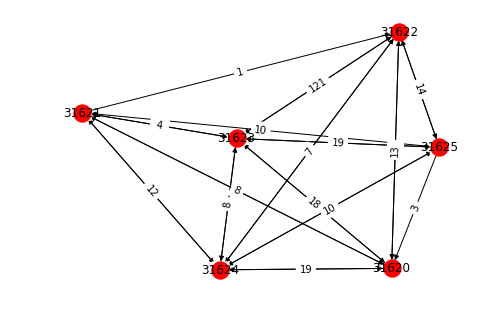

NodeView((31620, 31621, 31622, 31623, 31624, 31625))

In [7]:
#plot it 

pos= nx.spring_layout(G)
nx.draw(G,pos, with_labels=True)
labels = nx.get_edge_attributes(G,'Number')
print(labels)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()
G.nodes


## Computing max flow

In [ ]:
flow_value, flow_dict = nx.maximum_flow(G, 31620, 31621, capacity='Number')
# max flow in G from s to t, returns value and dictionary

print(flow_value)
flow_dict

## Algorithms in networkx
https://networkx.github.io/documentation/stable/reference/algorithms/index.html